📈 Sensitivity analysis is a technique used in process simulation to study the effect of changes in model inputs on the model outputs. It helps to identify the most significant input variables that influence the output and can help in identifying the critical parameters that need to be controlled in a process.

🔍 In a process simulation, sensitivity analysis is usually carried out by varying one or more input parameters and observing the resulting changes in the output variables. The input parameters are varied over a range of values, and the corresponding changes in the output variables are recorded. The analysis can be carried out using various methods, including statistical methods, mathematical models, and simulation tools.

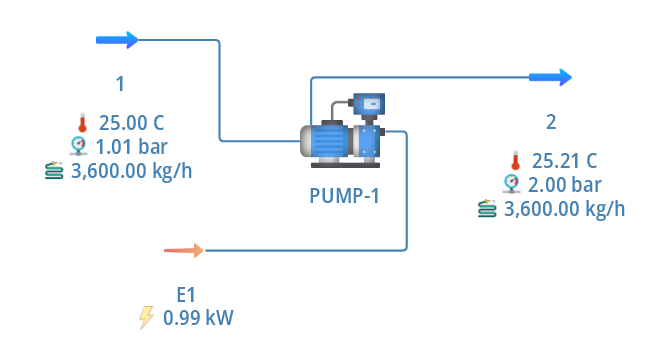

In [215]:
# Import the display function from the IPython.display module
from IPython.display import display

# Import the Image class from the PIL module
from PIL import Image

# Open an image file using the Image class and assign it to the variable Basis_image
Basis_image = Image.open(r"D:\08 Linked In\02 DWSim\00 Plan Personal\36 Sensitivity Analysis of Pump\36 Sensitivity Analysis of Pump.png")

# Display the Basis_image using the display function from IPython.display
display(Basis_image)

In [216]:
# Import the clr module, which provides the .NET Common Language Runtime (CLR) functionality for Python
import clr

# Import the System.IO module, which provides access to the input/output (I/O) operations on files and directories
import System.IO

# Import the System module, which provides access to common types and functionality in the .NET framework
import System

# Import the pythoncom module, which provides Python bindings for COM (Component Object Model) services
import pythoncom

# Import the Directory, Path, and File classes from the System.IO module, which provide methods for working with directories and files
from System.IO import Directory, Path, File

# Import the String and Environment classes from the System module, which provide methods for working with strings and environment variables
from System import String, Environment

# Initialize the COM components
pythoncom.CoInitialize()

# Set the path to the DWSIM installation folder
dwSimPath = r"C:\Users\viraj\AppData\Local\DWSIM\\"

# Add references to the DWSIM libraries using the clr module
# The AddReference method is used to add a reference to a .NET assembly
# The path to the assembly is constructed using the dwSimPath variable and the name of the assembly file
# Each assembly provides a specific set of functionality for DWSIM
clr.AddReference(dwSimPath + "CapeOpen.dll")
clr.AddReference(dwSimPath + "DWSIM.Automation.dll")
clr.AddReference(dwSimPath + "DWSIM.Interfaces.dll")
clr.AddReference(dwSimPath + "DWSIM.GlobalSettings.dll")
clr.AddReference(dwSimPath + "DWSIM.SharedClasses.dll")
clr.AddReference(dwSimPath + "DWSIM.Thermodynamics.dll")
clr.AddReference(dwSimPath + "DWSIM.UnitOperations.dll")
clr.AddReference(dwSimPath + "DWSIM.Inspector.dll")
clr.AddReference(dwSimPath + "System.Buffers.dll")

# Import specific classes from the DWSIM libraries using the "from...import" syntax
# The classes are used in the subsequent code to access specific functionality provided by DWSIM
from DWSIM.Interfaces.Enums.GraphicObjects import ObjectType
from DWSIM.Thermodynamics import Streams, PropertyPackages
from DWSIM.UnitOperations import UnitOperations
from DWSIM.Automation import Automation3
from DWSIM.GlobalSettings import Settings

# Set the current directory to the DWSIM installation folder using the Directory class from the System.IO module
# This is necessary so that the DWSIM libraries can be located and imported correctly
Directory.SetCurrentDirectory(dwSimPath)

In [217]:
# Create an instance of the Automation3 class from the DWSIM.Automation module
# This class provides methods for automating tasks in DWSIM, such as creating and manipulating flowsheets
interf = Automation3()

In [218]:
# Set the file path of an existing DWSIM flowsheet to be loaded using the Path.Combine method from the System.IO module
# The flowsheet file path is constructed using the Environment.GetFolderPath method to obtain the path to the desktop folder and the relative path to the flowsheet file
fileNameToLoad = Path.Combine(Environment.GetFolderPath(Environment.SpecialFolder.Desktop), r"D:\08 Linked In\02 DWSim\00 Plan Personal\36 Sensitivity Analysis of Pump\36 Sensitivity Analysis of Pump.dwxmz")

# Load the DWSIM flowsheet using the LoadFlowsheet method of the Automation3 class
# The method takes a single argument, which is the file path of the flowsheet to be loaded
# The method returns a Simulation object that represents the loaded flowsheet
sim = interf.LoadFlowsheet(fileNameToLoad)

In [219]:
All_obj = sim.get_GraphicObjects()

for obj in All_obj:
    print(obj.get_Value().ToString() + '\t' + obj.get_Key())


PUMP-1	BB-b54fc4d9-7256-4ef7-ac4c-0dfb967b2a4c
1	MAT-585b6dd5-ea27-4036-88af-e0ee034df1ce
2	MAT-cf88da6d-13d8-442a-9782-3fa4447f350f
E1	EN-b18b66dd-d2bc-4cfd-9faa-1c4ccc66c6a4


In [220]:
All_obj = sim.get_SimulationObjects()

for obj in All_obj:
    print(obj.get_Value().GetAsObject().GetDisplayName())

Energy Stream
Material Stream
Material Stream
Pump


In [221]:
Pump_obj = list(All_obj)[3].get_Value().GetAsObject()
print(f'The calc mode of the pump is', Pump_obj.get_CalcMode())
print(f'The outlet pressure of the pump is', Pump_obj.get_Pout(), 'Pa')
print(f'The Eff of the pump is', Pump_obj.get_Eficiencia(), '%')
print(f'The temp diff of the fluid is', Pump_obj.get_DeltaT(), 'K')
print(f'The power consumed by of the pump is', Pump_obj.get_DeltaQ(), 'kW')

The calc mode of the pump is OutletPressure
The outlet pressure of the pump is 200000.0 Pa
The Eff of the pump is 10.0 %
The temp diff of the fluid is 0.214823528241254 K
The power consumed by of the pump is 0.989671478563201 kW


+--------------+-------------------+
|   Efficiency |   Temp difference |
+==============+===================+
|           15 |        0.135931   |
+--------------+-------------------+
|           20 |        0.0964853  |
+--------------+-------------------+
|           25 |        0.0728179  |
+--------------+-------------------+
|           30 |        0.0570396  |
+--------------+-------------------+
|           35 |        0.0457694  |
+--------------+-------------------+
|           40 |        0.0373168  |
+--------------+-------------------+
|           45 |        0.0307426  |
+--------------+-------------------+
|           50 |        0.0254832  |
+--------------+-------------------+
|           55 |        0.02118    |
+--------------+-------------------+
|           60 |        0.0175941  |
+--------------+-------------------+
|           65 |        0.0145598  |
+--------------+-------------------+
|           70 |        0.011959   |
+--------------+-------------------+
|

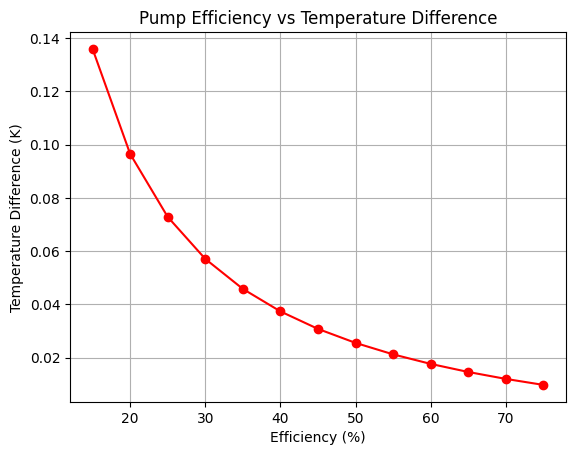

In [222]:
import openpyxl
import matplotlib.pyplot as plt
from tabulate import tabulate
from openpyxl.utils import get_column_letter
from openpyxl.styles import Alignment

current_eff = Pump_obj.get_Eficiencia()
Settings.SolverMode = 0
results = []

for i in range(13):
    current_eff += 5
    Pump_obj.set_Eficiencia(current_eff)
    errors = interf.CalculateFlowsheet2(sim)
    eff = Pump_obj.get_Eficiencia()
    temp_diff = Pump_obj.get_DeltaT()

    results.append([eff, temp_diff])

headers = ['Efficiency', 'Temp difference']

print(tabulate(results, headers=headers, tablefmt='grid'))

# Create two lists containing the x and y values for the graph
x_values = [row[0] for row in results]
y_values = [row[1] for row in results]

# Create the graph using matplotlib
plt.plot(x_values, y_values, 'ro-')
plt.title('Pump Efficiency vs Temperature Difference')
plt.xlabel('Efficiency (%)')
plt.ylabel('Temperature Difference (K)')
plt.grid(True)

# Show the graph in the terminal
plt.show()

# Create a new Excel workbook and worksheet
wb = openpyxl.Workbook()
ws = wb.active

# Write the headers to the worksheet
for i, header in enumerate(headers):
    cell = ws.cell(row=1, column=i+1)
    cell.value = header
    cell.alignment = Alignment(horizontal='center', vertical='center')

# Write the results to the worksheet
for r, row in enumerate(results):
    for c, value in enumerate(row):
        cell = ws.cell(row=r+2, column=c+1)
        cell.value = value
        cell.alignment = Alignment(horizontal='center', vertical='center')

# Autofit the column widths
for i in range(len(headers)):
    col_letter = get_column_letter(i+1)
    ws.column_dimensions[col_letter].auto_size = True

# Save the Excel file
wb.save(r'D:\08 Linked In\02 DWSim\00 Plan Personal\36 Sensitivity Analysis of Pump\results.xlsx')

In [223]:
# saving the modified version of file at same path

fileNameToSave = Path.Combine(Environment.GetFolderPath(Environment.SpecialFolder.Desktop), r"D:\08 Linked In\02 DWSim\00 Plan Personal\36 Sensitivity Analysis of Pump\036 Modified_flowsheet.dwxmz")

interf.SaveFlowsheet(sim, fileNameToSave, True)